# Math 42 Final Project
Finding out if there is a correlation between the amount of money the team has vs. the number of wins over the regular season.

There are 82 Regular Season games and success is determined by number of wins

Money is going to be compared by the payroll of the players & networth of the team

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
individual_salaries = pd.read_csv("team_salaries.csv")
all_team_stats = pd.read_csv("team_stats.csv")

# Data Cleaning

## Groupby team_salaries Data

In [148]:
team_salaries = individual_salaries.groupby("TEAM-SEASON").agg({"Salary" : ["sum", "mean", "median", "std"]})
team_salaries.columns = ["Total_Salary", "Mean_Salary", "Median_Salary", "STD_Salary"]
team_salaries = team_salaries.reset_index()
team_salaries.columns = ["Team_Season", "Total_Salary", "Mean_Salary", "Median_Salary", "STD_Salary"]
team_salaries.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2023,NBA,Atlanta Hawks,ATL,False,25.5,4.0,3.0,3.0,4.0,...,11.1,22.4,0.194,0.525,11.5,72.2,0.250,State Farm Arena,53083.0,17694.0
1,2023,NBA,Boston Celtics,BOS,False,27.6,4.0,2.0,3.0,3.0,...,12.7,19.1,0.226,0.532,10.8,74.9,0.212,TD Garden,57468.0,19156.0
2,2023,NBA,Brooklyn Nets,BRK,False,28.8,2.0,5.0,2.0,5.0,...,12.6,21.3,0.250,0.556,13.4,70.2,0.224,Barclays Center,87276.0,17455.0
3,2023,NBA,Chicago Bulls,CHI,False,28.0,3.0,4.0,3.0,4.0,...,12.7,24.6,0.269,0.564,15.9,79.9,0.201,United Center,76078.0,19020.0
4,2023,NBA,Charlotte Hornets,CHO,False,26.2,3.0,4.0,4.0,3.0,...,12.5,24.4,0.184,0.512,12.1,74.8,0.222,Spectrum Center,50386.0,16795.0


## Add Team_season variable to team_stats

In [5]:
team_stats = team_stats[ (team_stats["season"] >= 2003) & (team_stats["season"] <= 2019) ]
team_stats["Team_Season"] = team_stats.apply(lambda row: str(row.abbreviation) + "-" + str(row.season), axis=1)
team_stats.head()

,team,season,abbreviation,w,playoffs,Team_Season
124,Atlanta Hawks,2019,ATL,29.0,False,ATL-2019
125,Boston Celtics,2019,BOS,49.0,True,BOS-2019
126,Brooklyn Nets,2019,BRK,42.0,True,BRK-2019
127,Chicago Bulls,2019,CHI,22.0,False,CHI-2019
128,Charlotte Hornets,2019,CHO,39.0,False,CHO-2019


## Combine Data

In [6]:
data = pd.merge(team_stats, team_salaries, on="Team_Season")

## Add Variables

In [7]:
# Adding the Salary Cap Variable
salary_cap_conditions = [ 
    (data["season"] == 2019),
    (data["season"] == 2018),
    (data["season"] == 2017),
    (data["season"] == 2016),
    (data["season"] == 2015),
    (data["season"] == 2014),
    (data["season"] == 2013),
    (data["season"] == 2012),
    (data["season"] == 2011),
    (data["season"] == 2010),
    (data["season"] == 2009),
    (data["season"] == 2008),
    (data["season"] == 2007),
    (data["season"] == 2006),
    (data["season"] == 2005),
    (data["season"] == 2004),
    (data["season"] == 2003)
]
salary_cap_labels = [109140000, 101869000, 99093000, 94143000, 70000000, 
                     63065000, 58697000, 58044000, 58044000, 58040000, 
                     57700000, 58680000, 55630000, 53135000, 49500000, 
                     43870000, 43840000] 
data["Salary_Cap"] = np.select(salary_cap_conditions, salary_cap_labels)

data["Above_Salary_Cap"] = (data["Total_Salary"] - data["Salary_Cap"]) / data["Salary_Cap"]

In [8]:
# Adding percent of salary Variable
all_team_salaries = data.groupby("season")["Total_Salary"].sum()
all_team_salaries = all_team_salaries.reset_index()
all_team_salaries.columns = ["season", "Season_Salary"]
data = pd.merge(data, all_team_salaries, on="season")

data["Percent_League_Salary"] = data["Total_Salary"] / data["Season_Salary"]

In [9]:
data = data.dropna()
data.head()

,team,season,abbreviation,w,playoffs,Team_Season,Total_Salary,Mean_Salary,Median_Salary,STD_Salary,Salary_Cap,Above_Salary_Cap,Season_Salary,Percent_League_Salary
0,Atlanta Hawks,2019,ATL,29.0,False,ATL-2019,66443526,3.691307e+06,1942800.0,4.693193e+06,109140000,-0.391208,3599744086,0.018458
1,Boston Celtics,2019,BOS,49.0,True,BOS-2019,154255448,9.640966e+06,5181780.0,1.111157e+07,109140000,0.413372,3599744086,0.042852
2,Chicago Bulls,2019,CHI,22.0,False,CHI-2019,80706074,5.044130e+06,2167728.0,5.568329e+06,109140000,-0.260527,3599744086,0.022420
3,Cleveland Cavaliers,2019,CLE,19.0,False,CLE-2019,112729947,8.671534e+06,3263294.0,8.748628e+06,109140000,0.032893,3599744086,0.031316
4,Dallas Mavericks,2019,DAL,33.0,False,DAL-2019,49309106,4.109092e+06,2627900.5,3.694928e+06,109140000,-0.548203,3599744086,0.013698


In [10]:
data.to_csv("salaries_team_data.csv", index = False)

# Importing Functions

In [15]:
from numpy import array, exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt 

import math
import statistics

In [12]:
from sklearn import linear_model
import statsmodels.api as sm

In [43]:
def func(x, a, b, c):
    return a * np.log(b * x) + c

def func1(x, a, b, c):
    return a*x**2+b*x+c

def func2(x, a, b, c, d):
    return a*x**3 + b*x**2 + c*x + d

In [ ]:
#regr = linear_model.LinearRegression()
#regr.fit(x, y)
#model = sm.OLS(data.Mean_Salary, data.w).fit()
#print_model = model.summary()
#print(print_model)

# Mean Salary of a Team

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


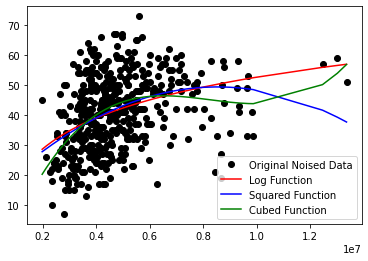

In [14]:
data = data.sort_values(by = "Mean_Salary")
popt, pcov = curve_fit(func, data.Mean_Salary, data.w)

params, covs = curve_fit(func1, data.Mean_Salary, data.w)
a, b, c = params[0], params[1], params[2]
x = data["Mean_Salary"]
y = a*data.Mean_Salary**2 + b*data.Mean_Salary + c

params, covs = curve_fit(func2, data.Mean_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]
x = data["Mean_Salary"]
y2 = a*x**3 + b*x**2 + c*x + d

plt.figure()
plt.plot(data.Mean_Salary, data.w, 'ko', label="Original Noised Data")
plt.plot(data.Mean_Salary, func(data.Mean_Salary, *popt), 'r-', label="Log Function")
plt.plot(data.Mean_Salary, y, 'b', label="Squared Function")
plt.plot(data.Mean_Salary, y2, 'g', label="Cubed Function")
plt.legend()
plt.show()

In [221]:
params, covs = curve_fit(f = func, xdata = data.Mean_Salary, ydata = data.w)
a, b, c = params[0], params[1], params[2]

x = data["Mean_Salary"]
y = data["w"]
yfit = a * np.log(b * x) + c

yresid = yfit - y
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.1428518420652941


In [222]:
params, covs = curve_fit(func1, data.Mean_Salary, data.w)
a, b, c = params[0], params[1], params[2]

x = data["Mean_Salary"]
y = data["w"]
yfit = a*x**2+b*x+c

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.15046166861340726


In [232]:
params, covs = curve_fit(func2, data.Mean_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]
y = data["w"]
x = data["Mean_Salary"]
yfit = a*x**3 + b*x**2 + c*x + d

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.18158999296698697


# Standard Deviation of the Salary

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


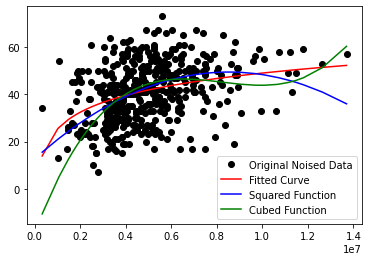

In [235]:
data = data.sort_values(by = "STD_Salary")
popt, pcov = curve_fit(func, data.STD_Salary, data.w)

params, covs = curve_fit(func1, data.Mean_Salary, data.w)
a, b, c = params[0], params[1], params[2]
x = data["STD_Salary"]
y = a*x**2 + b*x + c

params, covs = curve_fit(func2, data.Mean_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]
x = data["STD_Salary"]
y2 = a*x**3 + b*x**2 + c*x + d

plt.figure()
plt.plot(data.STD_Salary, data.w, 'ko', label="Original Noised Data")
plt.plot(data.STD_Salary, func(data.STD_Salary, *popt), 'r-', label="Fitted Curve")
plt.plot(data.STD_Salary, y, 'b', label="Squared Function")
plt.plot(data.STD_Salary, y2, 'g', label="Cubed Function")
plt.legend()
plt.show()

In [223]:
popt, pcov = curve_fit(func, data.STD_Salary, data.w)
x = data["STD_Salary"]
y = data["w"]
yfit = func(data.STD_Salary, *popt)

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.12363194852255543


In [236]:
params, covs = curve_fit(func1, data.Mean_Salary, data.w)
a, b, c = params[0], params[1], params[2]

x = data["STD_Salary"]
y = data["w"]
yfit = a*x**2+b*x+c

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.10004624746535629


In [238]:
params, covs = curve_fit(func2, data.Mean_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]

x = data["STD_Salary"]
y = data["w"]
yfit = a*x**3 + b*x**2 + c*x + d

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.00016498930360286934


# Total Salary of Team

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


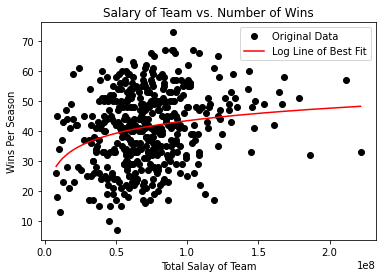

In [114]:
data = data.sort_values(by = "Total_Salary")
popt, pcov = curve_fit(func, data.Total_Salary, data.w)

params, covs = curve_fit(func1, data.Total_Salary, data.w)
a, b, c = params[0], params[1], params[2]
x = data["Total_Salary"]
y = a*x**2 + b*x + c

params, covs = curve_fit(func2, data.Total_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]
x = data["Total_Salary"]
y2 = a*x**3 + b*x**2 + c*x + d

plt.figure()
plt.plot(data.Total_Salary, data.w, 'ko', label="Original Data")
plt.plot(data.Total_Salary, func(data.Total_Salary, *popt), 'r-', label="Log Line of Best Fit")
#plt.plot(data.Total_Salary, y, 'b', label="Squared Function")
#plt.plot(data.Total_Salary, y2, 'g', label="Cubed Function")
plt.title("Salary of Team vs. Number of Wins")
plt.xlabel('Total Salay of Team')
plt.ylabel('Wins Per Season')
plt.legend()
plt.show()

In [292]:
popt, pcov = curve_fit(func, data.Total_Salary, data.w)
x = data["Total_Salary"]
y = data["w"]
yfit = func(data.Total_Salary, *popt)

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.05809259211300466


C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [293]:
params, covs = curve_fit(func1, data.Total_Salary, data.w)
a, b, c = params[0], params[1], params[2]

x = data["Total_Salary"]
y = data["w"]
yfit = a*x**2+b*x+c

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.06300047163197398


In [294]:
params, covs = curve_fit(func2, data.Total_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]

x = data["Total_Salary"]
y = data["w"]
yfit = a*x**3 + b*x**2 + c*x + d

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.06348268779211519


# Median Salary

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


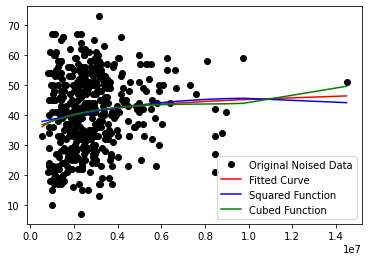

In [267]:
data = data.sort_values(by = "Median_Salary")
popt, pcov = curve_fit(func, data.Median_Salary, data.w)

params, covs = curve_fit(func1, data.Median_Salary, data.w)
a, b, c = params[0], params[1], params[2]
x = data["Median_Salary"]
y = a*x**2 + b*x + c

params, covs = curve_fit(func2, data.Median_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]
x = data["Median_Salary"]
y2 = a*x**3 + b*x**2 + c*x + d

plt.figure()
plt.plot(data.Median_Salary, data.w, 'ko', label="Original Noised Data")
plt.plot(data.Median_Salary, func(data.Median_Salary, *popt), 'r-', label="Fitted Curve")
plt.plot(data.Median_Salary, y, 'b', label="Squared Function")
plt.plot(data.Median_Salary, y2, 'g', label="Cubed Function")
plt.legend()
plt.show()

In [271]:
popt, pcov = curve_fit(func, data.Median_Salary, data.w)
x = data["Median_Salary"]
y = data["w"]
yfit = func(data.Median_Salary, *popt)

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.01856918377793837


In [269]:
params, covs = curve_fit(func1, data.Median_Salary, data.w)
a, b, c = params[0], params[1], params[2]

x = data["Median_Salary"]
y = data["w"]
yfit = a*x**2+b*x+c

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.018305535407886486


In [270]:
params, covs = curve_fit(func2, data.Median_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]

x = data["Median_Salary"]
y = data["w"]
yfit = a*x**3 + b*x**2 + c*x + d

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.019713201042103834


# Percentage above the Salary Cap

In [264]:
data = data.sort_values(by = "Above_Salary_Cap")
popt, pcov = curve_fit(func, data.Above_Salary_Cap, data.w)

params, covs = curve_fit(func1, data.Above_Salary_Cap, data.w)
a, b, c = params[0], params[1], params[2]
x = data["Above_Salary_Cap"]
y = a*x**2 + b*x + c

params, covs = curve_fit(func2, data.Above_Salary_Cap, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]
x = data["Above_Salary_Cap"]
y2 = a*x**3 + b*x**2 + c*x + d

plt.figure()
plt.plot(data.Above_Salary_Cap, data.w, 'ko', label="Original Noised Data")
plt.plot(data.Above_Salary_Cap, func(data.Above_Salary_Cap, *popt), 'r-', label="Fitted Curve")
plt.plot(data.Above_Salary_Cap, y, 'b', label="Squared Function")
plt.plot(data.Above_Salary_Cap, y2, 'g', label="Cubed Function")
plt.legend()
plt.show()

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [258]:
popt, pcov = curve_fit(func, data.Above_Salary_Cap, data.w)
x = data["Above_Salary_Cap"]
y = data["w"]
yfit = func(data.Above_Salary_Cap, *popt)

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [256]:
params, covs = curve_fit(func1, data.Above_Salary_Cap, data.w)
a, b, c = params[0], params[1], params[2]

x = data["Above_Salary_Cap"]
y = data["w"]
yfit = a*x**2+b*x+c

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.07979937914658353


In [255]:
params, covs = curve_fit(func2, data.Above_Salary_Cap, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]

x = data["Above_Salary_Cap"]
y = data["w"]
yfit = a*x**3 + b*x**2 + c*x + d

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.08653294511247034


# Log of Percent of League Salary

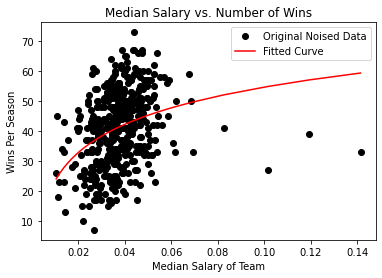

In [115]:
data = data.sort_values(by = "Percent_League_Salary")
popt, pcov = curve_fit(func, data.Percent_League_Salary, data.w)

params, covs = curve_fit(func1, data.Percent_League_Salary, data.w)
a, b, c = params[0], params[1], params[2]
x = data["Percent_League_Salary"]
y = a*x**2 + b*x + c

params, covs = curve_fit(func2, data.Percent_League_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]
x = data["Percent_League_Salary"]
y2 = a*x**3 + b*x**2 + c*x + d

plt.figure()
plt.plot(data.Percent_League_Salary, data.w, 'ko', label="Original Noised Data")
plt.plot(data.Percent_League_Salary, func(data.Percent_League_Salary, *popt), 'r-', label="Fitted Curve")
#plt.plot(data.Percent_League_Salary, y, 'b', label="Squared Function")
#plt.plot(data.Percent_League_Salary, y2, 'g', label="Cubed Function")
plt.title("Median Salary vs. Number of Wins")
plt.xlabel('Median Salary of Team')
plt.ylabel('Wins Per Season')
plt.legend()
plt.show()

In [299]:
popt, pcov = curve_fit(func, data.Percent_League_Salary, data.w)
x = data["Percent_League_Salary"]
y = data["w"]
yfit = func(data.Percent_League_Salary, *popt)

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.11308816671558852


In [245]:
params, covs = curve_fit(func1, data.Percent_League_Salary, data.w)
a, b, c = params[0], params[1], params[2]

x = data["Percent_League_Salary"]
y = data["w"]
yfit = a*x**2+b*x+c

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.14277520469961646


In [246]:
params, covs = curve_fit(func2, data.Percent_League_Salary, data.w)
a, b, c, d = params[0], params[1], params[2], params[3]

x = data["Percent_League_Salary"]
y = data["w"]
yfit = a*x**3 + b*x**2 + c*x + d

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.14581151008804583


# New Data Points

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


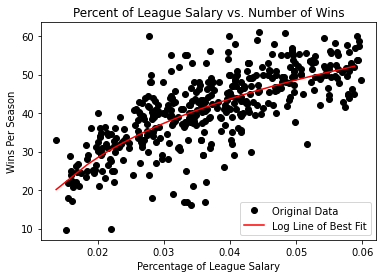

In [160]:
data = data.sort_values(by = "Percent_League_Salary")
#data_new1 = data[(data["w"] > 50) & (data["Percent_League_Salary"] < 0.03)]
data_new = data[(data["season"] > 2014) & (data["Percent_League_Salary"] < 0.06) & (data["w"] < 62)]


popt_PLS, pcov = curve_fit(func, data_new.Percent_League_Salary, data_new.w)
log_y = func(data_new.Percent_League_Salary, *popt_PLS)

rand_num = np.random.rand(400) * 0.06
new_x_vals = rand_num[(rand_num > 0.015)]

sigma = 4
mu = 0.1
noise = sigma * np.random.randn(len(new_x_vals)) + mu

new_y_vals = func(new_x_vals, *popt_PLS)
new_y_vals = new_y_vals + noise

data_x = np.concatenate((data_new.Percent_League_Salary, new_x_vals))
data_y = np.concatenate((data_new.w, new_y_vals))




plt.figure()
plt.plot(data_x, data_y, 'ko', label="Original Data")
plt.plot(data_new.Percent_League_Salary, log_y, 'r-', label="Log Line of Best Fit")
plt.title("Percent of League Salary vs. Number of Wins")
plt.xlabel('Percentage of League Salary')
plt.ylabel('Wins Per Season')
plt.legend()
plt.show()

In [161]:
popt, pcov = curve_fit(func, data_x, data_y)
x = data_x
y = data_y
yfit = func(data_x, *popt_PLS)

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.5624991908189015


C:\Users\derek\AppData\Local\Temp\ipykernel_24528\3577450042.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


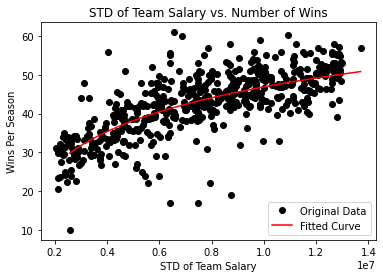

In [169]:
data = data.sort_values(by = "STD_Salary")
data_new = data[(data["season"] > 2015) & (data["w"] < 62)]
#data_new = data_new[(data_new["STD_Salary"] > 0.4*10**7) & (data_new["w"] < 50)]

x = data_new.STD_Salary
y = data_new.w

popt_STD, pcov = curve_fit(func, x, y)
log_y = func(x, *popt_STD)

rand_num2 = np.random.rand(500) * 1.3*10**7
new_x_vals = rand_num2[(rand_num2 > 0.2*10**7)]

sigma = 4
mu = 0.1
noise = sigma * np.random.randn(len(new_x_vals)) + mu

new_y_vals = func(new_x_vals, *popt_STD)
new_y_vals = new_y_vals + noise

data_x = np.concatenate((x, new_x_vals))
data_y = np.concatenate((y, new_y_vals))


plt.figure()
plt.plot(data_x, data_y, 'ko', label="Original Data")
plt.plot(x, log_y, 'r-', label="Fitted Curve")
plt.title("STD of Team Salary vs. Number of Wins")
plt.xlabel('STD of Team Salary')
plt.ylabel('Wins Per Season')
plt.legend()
plt.show()

In [167]:
popt, pcov = curve_fit(func, data_x, data_y)
x = data_x
y = data_y
yfit = func(data_x, *popt_STD)

yresid = array(yfit) - array(y)
ssresid = sum(pow(yresid, 2))
sstotal = len(y) * statistics.variance(y)
rsq = 1 - ssresid/sstotal
print(rsq)

0.5477376758811311


C:\Users\derek\AppData\Local\Temp\ipykernel_24528\3577450042.py:2: RuntimeWarning: invalid value encountered in log
  return a * np.log(b * x) + c


# Predictive Model

In [154]:
season22_23 = pd.read_csv("NBA_Salary_22_23.csv")
stats_22_23 = season22_23.groupby("Team").agg({"Salary" : ["sum", "std"]})
stats_22_23.columns = ["Total_Salary", "STD_Salary"]

In [158]:
stats_22_23 = stats_22_23.reset_index()
total_salary = sum(stats_22_23["Total_Salary"])
stats_22_23["Percent_League_Salary"] = stats_22_23["Total_Salary"] / total_salary
stats_22_23.head()

,level_0,index,Team,Total_Salary,STD_Salary,Percent_League_Salary
0,0,0,Atlanta Hawks,162503959,1.000516e+07,0.036538
1,1,1,Boston Celtics,183233457,1.014407e+07,0.041199
2,2,2,Brooklyn Nets,181110181,1.469851e+07,0.040722
3,3,3,Charlotte Hornets,114688843,8.165254e+06,0.025787
4,4,4,Chicago Bulls,149647267,1.105118e+07,0.033648


In [180]:
#STD Values
STD_x = stats_22_23["STD_Salary"]
STD_vals = func(STD_x, *popt_STD)

#Percent League Salary Values
PLS_x = stats_22_23["Percent_League_Salary"]
PLS_vals = func(PLS_x, *popt_PLS)

stats_22_23["Expected_Wins"] = (PLS_vals + STD_vals) / 2
table = stats_22_23[["Team", "Expected_Wins"]]

season_results = table.sort_values(by = "Expected_Wins", ascending = False)
season_results["rank"] = range(1,31)

In [181]:
season_results[["rank", "Team", "Expected_Wins"]].head(15)

,rank,Team,Expected_Wins
9,1,Golden State Warriors,49.144752
13,2,Los Angeles Lakers,48.082649
12,3,LA Clippers,47.968157
2,4,Brooklyn Nets,47.912459
16,5,Milwaukee Bucks,47.311276
1,6,Boston Celtics,45.705954
23,7,Phoenix Suns,45.616672
24,8,Portland Trail Blazers,45.376296
7,9,Denver Nuggets,45.347333
22,10,Philadelphia 76ers,45.220253


In [182]:
season_results[["rank", "Team", "Expected_Wins"]].tail(15)

,rank,Team,Expected_Wins
4,16,Chicago Bulls,44.019871
5,17,Cleveland Cavaliers,43.423408
18,18,New Orleans Pelicans,43.416683
27,19,Toronto Raptors,43.214756
19,20,New York Knicks,42.089077
25,21,Sacramento Kings,40.675090
28,22,Utah Jazz,40.221594
3,23,Charlotte Hornets,39.190674
14,24,Memphis Grizzlies,38.017730
21,25,Orlando Magic,38.004734


# Experiment Stuff

In [302]:
for i in range(2005, 2019):
    new_data = data[data["season"] > i]
    
    popt, pcov = curve_fit(func, new_data.Percent_League_Salary, new_data.w)
    x = new_data["Percent_League_Salary"]
    y = new_data["w"]
    yfit = func(new_data.Percent_League_Salary, *popt)

    yresid = array(yfit) - array(y)
    ssresid = sum(pow(yresid, 2))
    sstotal = len(y) * statistics.variance(y)
    rsq = 1 - ssresid/sstotal
    print(rsq)

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.13835279233344333
0.14637866471903394
0.16232084642408695
0.17919235570090664
0.20594063379981753
0.21626647404451593
0.22763079389978624
0.23522264578104146
0.2256377103062569
0.20987484674176693
0.20254883084525965
0.18633788478944724
0.21478822630711703
0.23154078486511043


In [306]:
for i in range(2005, 2019):
    new_data = data[data["season"] > i]
    
    popt, pcov = curve_fit(func, new_data["STD_Salary"], new_data.w)
    x = new_data["STD_Salary"]
    y = new_data["w"]
    yfit = func(new_data.STD_Salary, *popt)

    yresid = array(yfit) - array(y)
    ssresid = sum(pow(yresid, 2))
    sstotal = len(y) * statistics.variance(y)
    rsq = 1 - ssresid/sstotal
    print(rsq)

C:\Users\derek\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


0.16266522676841355
0.1769662602845513
0.19480321416282564
0.19489076261760208
0.18163405178600156
0.1789452862708123
0.17108653737138702
0.13773865595673584
0.13226691467206775
0.12267845565211899
0.13103532250053418
0.1732062643214688
0.2054381396334759
0.17310194332003415


In [303]:
for i in range(2005, 2019):
    new_data = data[data["season"] > i]
    
    popt, pcov = curve_fit(func, new_data.Mean_Salary, new_data.w)
    x = new_data["Mean_Salary"]
    y = new_data["w"]
    yfit = func(new_data.Mean_Salary, *popt)

    yresid = array(yfit) - array(y)
    ssresid = sum(pow(yresid, 2))
    sstotal = len(y) * statistics.variance(y)
    rsq = 1 - ssresid/sstotal
    print(rsq)

0.16668456910402185
0.17349410002895782
0.18342063975737388
0.18530228633784618
0.18609436070901753
0.17420477138753632
0.16717539979715978
0.12840896146844305
0.15945537305939628
0.16016536013232996
0.13835187092865076
0.1279027025072058
0.17620250364815682
0.24937170398648978


# Original Data Sets

In [25]:
all_team_stats.head()

,season,lg,team,abbreviation,playoffs,age,w,l,pw,pl,...,tov_percent,orb_percent,ft_fga,opp_e_fg_percent,opp_tov_percent,opp_drb_percent,opp_ft_fga,arena,attend,attend_g
0,2023,NBA,Atlanta Hawks,ATL,False,25.5,4.0,3.0,3.0,4.0,...,11.1,22.4,0.194,0.525,11.5,72.2,0.250,State Farm Arena,53083.0,17694.0
1,2023,NBA,Boston Celtics,BOS,False,27.6,4.0,2.0,3.0,3.0,...,12.7,19.1,0.226,0.532,10.8,74.9,0.212,TD Garden,57468.0,19156.0
2,2023,NBA,Brooklyn Nets,BRK,False,28.8,2.0,5.0,2.0,5.0,...,12.6,21.3,0.250,0.556,13.4,70.2,0.224,Barclays Center,87276.0,17455.0
3,2023,NBA,Chicago Bulls,CHI,False,28.0,3.0,4.0,3.0,4.0,...,12.7,24.6,0.269,0.564,15.9,79.9,0.201,United Center,76078.0,19020.0
4,2023,NBA,Charlotte Hornets,CHO,False,26.2,3.0,4.0,4.0,3.0,...,12.5,24.4,0.184,0.512,12.1,74.8,0.222,Spectrum Center,50386.0,16795.0


In [26]:
individual_salaries.head()

,Player,Team,Salary,Season,Abb,TEAM-SEASON
0,Shaquille O'Neal,Los Angeles Lakers,23571000,2003,LAL,LAL-2003
1,Juwan Howard,Denver Nuggets,20625000,2003,DEN,DEN-2003
2,Karl Malone,Utah Jazz,19250000,2003,UTA,UTA-2003
3,Dikembe Mutombo,New Jersey Nets,16105000,2003,BKN,BKN-2003
4,Damon Stoudamire,Portland Trail Blazers,13500000,2003,POR,POR-2003
